In [1]:
from fastai.tabular import *

In [2]:
path = Path('project_data/ECE2191_assignment')

In [3]:
mydata = pd.read_csv(path/'assignment_data.csv')

In [4]:
mydata.head()

,ID,Pwave,SDRR,Diagnosis
0,1,1,0.072610,0
1,2,1,0.040479,0
2,3,0,0.102325,1
3,4,0,0.188909,1
4,5,1,0.013634,0


In [6]:
dep_var = 'Diagnosis'
cat_names = ['Pwave']
cont_names = ['SDRR']
procs = [FillMissing, Categorify, Normalize]

In [7]:
data = (TabularList.from_df(mydata, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(1200,1600)))
                           .label_from_df(cols=dep_var)
                           #.add_test(test)
                           .databunch())

In [8]:
data.show_batch(rows=5)

Pwave,SDRR,target
1,-1.1818,0
0,-0.1200,1
0,3.5257,1
0,2.3434,1
0,-1.3505,1


In [9]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)

In [10]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


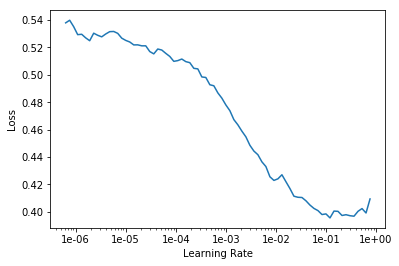

In [11]:
learn.recorder.plot()

In [12]:
learn.fit(4,1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.343244,0.502620,0.785000,00:00
1,0.309513,0.428689,0.800000,00:00
2,0.294703,0.357521,0.822500,00:00
3,0.286753,0.302071,0.872500,00:00


In [13]:
learn.fit(8,1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.279369,0.301031,0.872500,00:00
1,0.282393,0.294932,0.877500,00:00
2,0.280879,0.276269,0.890000,00:00
3,0.280861,0.278515,0.895000,00:00
4,0.277191,0.279615,0.882500,00:00
5,0.283706,0.277085,0.890000,00:00
6,0.278835,0.276832,0.897500,00:00
7,0.278463,0.279307,0.885000,00:00


In [14]:
learn.save('weights-2')